#### Library Management

Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading & Cleaning the Data

Import data from CSV using Pandas dataframe

In [2]:
df = pd.read_csv('train.csv')

Let's first find some more information about our dataframe to get started.

In [3]:
df.shape

(103904, 25)

103904 total customer satisfaction entries.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Let's address three issues with the data:
1. The first two columns are trivial. Remove them from the dataframe.
2. The 'Arrival Delay in Minutes' column is missing 310 values. These values should be populated to avoid issues later.
3. Despite most the data being categorical, none of the Dtypes are labeled as such. Recharacterize the the categorical data with a categorical Dtype.

Remove the trivial columns:

In [6]:
df = df.drop('Unnamed: 0', axis = 1)
df = df.drop('id', axis = 1)

Populate the missing 310 values in 'Arrival Delay in Minutes'

In [7]:
df['Arrival Delay in Minutes'].fillna(value = 0, inplace = True)  # arrival time should default to 0 if there is no information
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].apply(int) # convert the arrival delay to an integer for consistency

Let's double check our work.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             103904 non-null  object
 1   Customer Type                      103904 non-null  object
 2   Age                                103904 non-null  int64 
 3   Type of Travel                     103904 non-null  object
 4   Class                              103904 non-null  object
 5   Flight Distance                    103904 non-null  int64 
 6   Inflight wifi service              103904 non-null  int64 
 7   Departure/Arrival time convenient  103904 non-null  int64 
 8   Ease of Online booking             103904 non-null  int64 
 9   Gate location                      103904 non-null  int64 
 10  Food and drink                     103904 non-null  int64 
 11  Online boarding                    103904 non-null  

Finally, let's address the incorrect Dtype issue. Keep in mind that all customer satisfaction ratings are categorical, with the following distinction 0: N/A, 1-5, with 5 being the greatest level of satisfaction.

Let's go through a discussion of each variable first:

1. **Gender:** male or female classification of passengers (categorical)
2. **Customer Type:** loyal or disloyal passenger (categorical)
3. **Age:** actual age of passenger (quantitative - int64)
4. **Type of travel:** travel is for personal or business? (categorical)
5. **Class: business:** economy, or economy plus travel (categorical)
6. **Flight distance:** in miles (quantitative - int64)
7. **Inflight wifi services:** passenger satisfaction regarding inflight wifi services (categorical)
8. **Departure/arrival time convenience:** how satisfied is the passenger with the arrival and departure times? (categorical)
9. **Ease of online booking:** how easy the online booking process was (categorical)
10. **Gate location:** satisfaction level of gate location (categorical)
11. **Food and drink:** satisfaction level of food and drink served (categorical)
12. **Online boarding:** satisfaction level of online boarding (categorical)
13. **Seat comfort:** satisfaction level of seat comfort (categorical)
14. **Inflight entertainment:** satisfaction level of inflight entertainment (categorical)
15. **On-board service:** satisfaction level of onboarding services ? (categorical)
16. **Leg room service:** satisfaction level of leg room (categorical)
17. **Baggage handling:** satisfaction level of baggage handling (categorical)
18. **Check-in service:** satisfaction level of check-in service, gate agents (categorical)
19. **Inflight service:** satisfaction level of inflight service, flight attendants (categorical)
20. **Cleanliness:** satisfaction level of cleanliness (categorical)
21. **Departure Delay in Minutes:** minutes delayed for flight departure (quantitative - int64)
22. **Arrival Delay in Minutes:** minutes delayed upon arrival (quantitative - float64)
23. **Satisfaction:** overall airline  satisfaction level, can be either (satisfied, neutral, or dissatisfaction) (can keep this as an object because this is the target)

Let's make the proper changes to Dtypes.

In [9]:
#  certaintly not the most efficient approach but it works

headers = list(df.columns.values)
non_categoricals = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']

for column in headers:
    if column not in non_categoricals:
        df = df.astype({column : 'category'})

Again, let's check our work for the last time.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

## Data Visualization 

Gather some basic data about each of the following quantatative features.

In [11]:
df.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.133392
std,15.114964,997.147281,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


Notice how this only provides information for non-categorical data, which is fine. This data does not provide anything particular insightful, but it does give us a baseline to start thinking of important information.

##### Correlation Matrix

In [12]:
df.corr()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099461,-0.010152,-0.012105
Flight Distance,0.099461,1.000000,0.002158,-0.002470
Departure Delay in Minutes,-0.010152,0.002158,1.000000,0.960247
Arrival Delay in Minutes,-0.012105,-0.002470,0.960247,1.000000


Unsurprisingly, there is a strong correlation between 'Arrival Delay in Minutes' and 'Departure Delay in Minutes.' If a flight is delayed by ten minutes at departure, the flight will likely be delayed around ten minutes at arrival. This is very likely a linear relationship. We will investigate this further.

##### Age & Gender Distribution of Dataset

Gather some insight about the age distribution of customers might generate some useful information.

Text(0.5, 1.0, 'Distribution of Airline Passenger Ages')

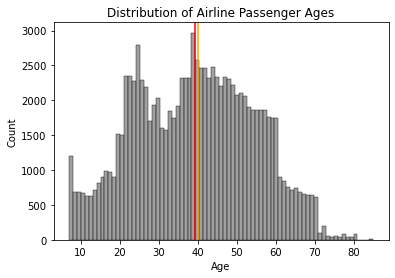

In [13]:
sns.histplot(df['Age'], color = 'gray')
plt.axvline(x = df['Age'].mean(), color = 'red')
plt.axvline(x = df['Age'].median(), color = 'orange')
plt.title('Distribution of Airline Passenger Ages')

Above is a histogram showing the distribution of airline passenger ages. The red line represents the mean of the distribution, with the orange line representing the median.

Some important notes from this distribution:
1. Distribution appears to be bimodal, with a peak in the early 20s and another around the age of 40.
2. Number of passengers decreases when the age increases over roughly 60 years of age.

Text(0, 0.5, '')

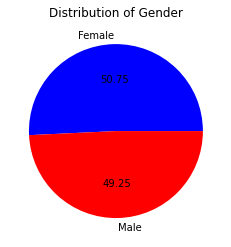

In [14]:
df.groupby('Gender').size().plot(kind='pie', autopct='%.2f', colormap = 'bwr')
plt.title('Distribution of Gender')
plt.ylabel('')

Males and females are roughly equally represented in the dataset.

Next, let's see if overall satisfaction is affected by gender.

In [15]:
males = df.loc[df['Gender'] == 'Male']
females = df.loc[df['Gender'] == 'Female']

Text(0, 0.5, '')

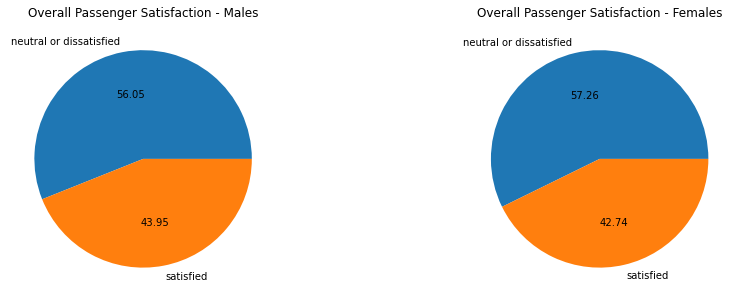

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))

males.groupby('satisfaction').size().plot(kind='pie', autopct='%.2f', ax = ax[0])
ax[0].set_title('Overall Passenger Satisfaction - Males')
ax[0].set_ylabel('')

females.groupby('satisfaction').size().plot(kind='pie', autopct='%.2f', ax = ax[1])
ax[1].set_title('Overall Passenger Satisfaction - Females')
ax[1].set_ylabel('')

Men and women do not display significant differences in their levels of satisfaction with the airline.

#### Feature Analysis on Overall Satisfaction

The following displays all the categorical features in the data set vs. overall customer satisfaction.

Most of the categorical data below is categorized by 0-5. For example, if a customer answers that cleanliness is a 5, that means they are very satisfied with the cleanliness of the airline.

The collection of graphs below is a lot of information at once, but this can streamline the data analysis process.

As a side note, I understand that this subplot feature can be accomplished more efficiently with a for loop.

<AxesSubplot:xlabel='Cleanliness', ylabel='count'>

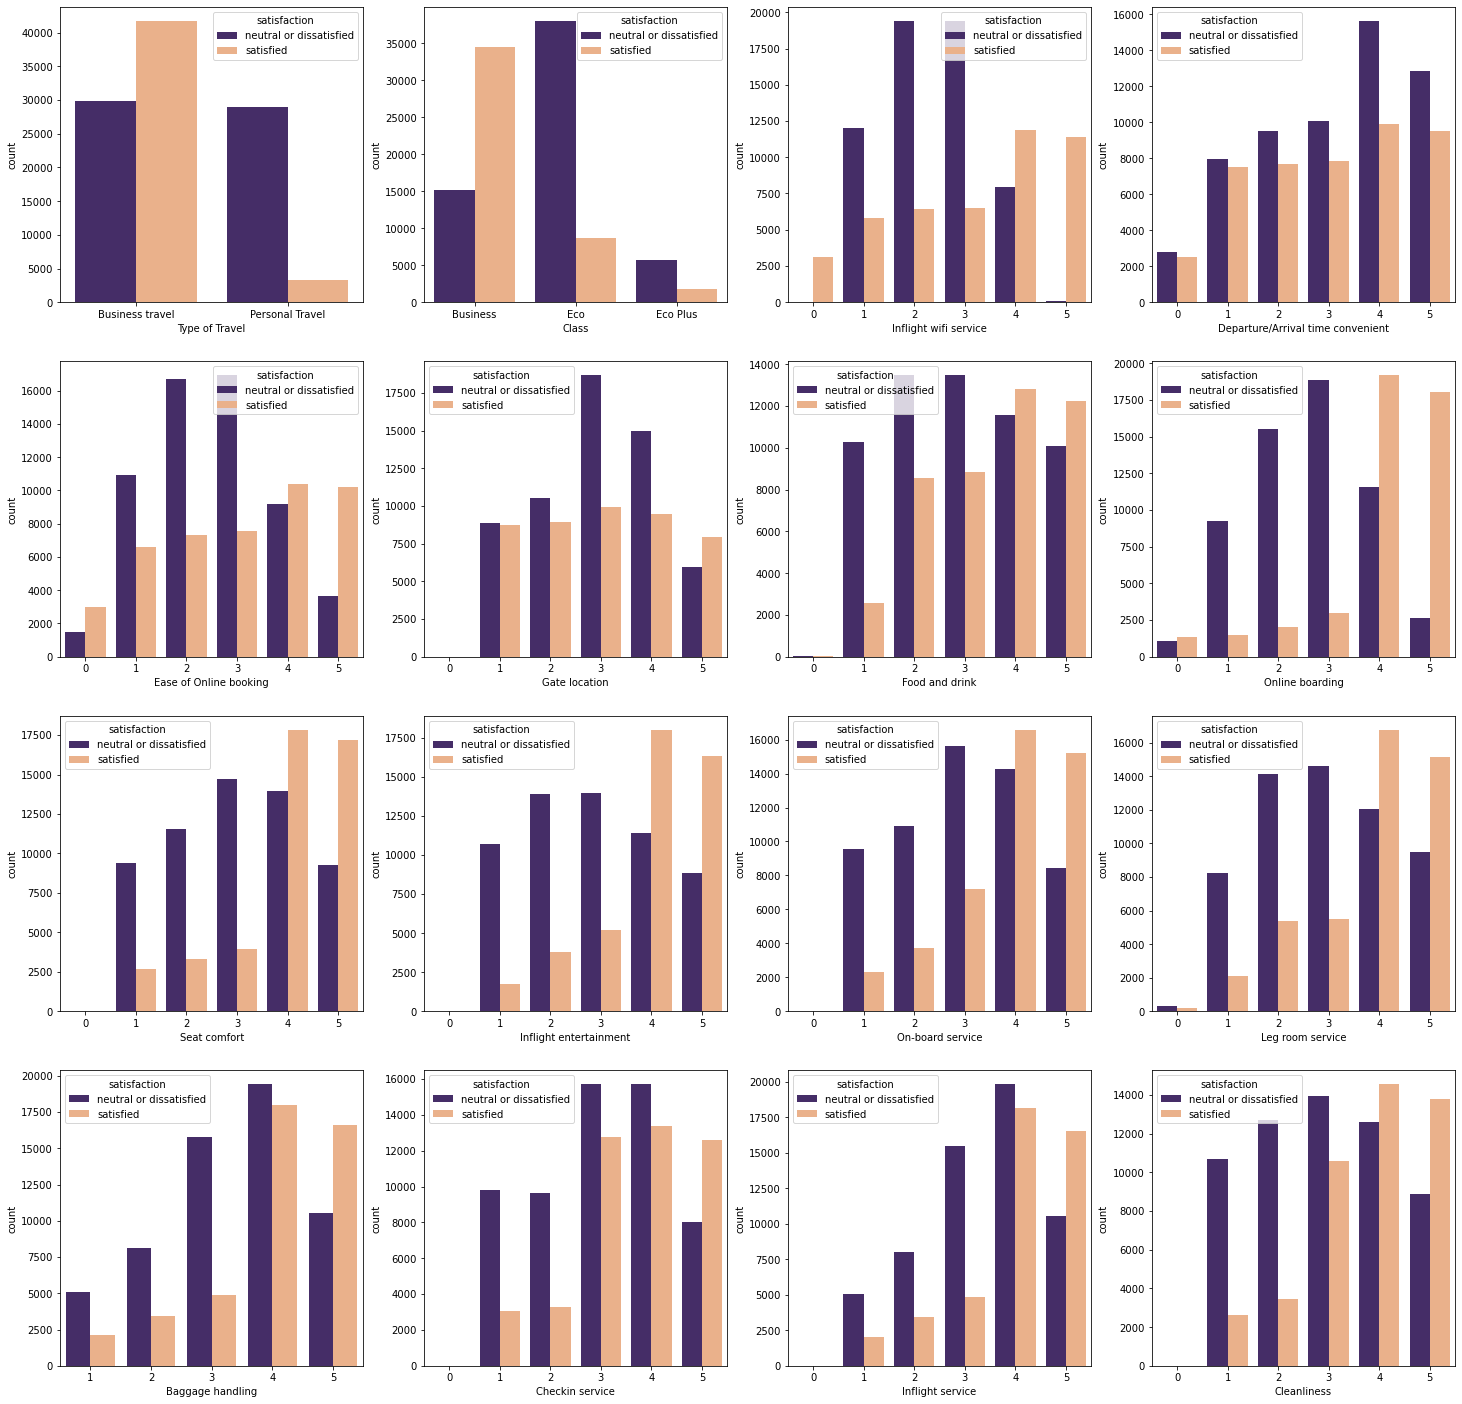

In [17]:
fig, ax = plt.subplots(4, 4, figsize = (25, 25))

sns.countplot(x = 'Type of Travel', hue = 'satisfaction', data = df, ax = ax[0][0], palette=['#432371',"#FAAE7B"])
sns.countplot(x = 'Class', hue = 'satisfaction', data = df, ax = ax[0][1], palette=['#432371',"#FAAE7B"])
sns.countplot(x = 'Inflight wifi service', hue = 'satisfaction', data = df, ax = ax[0][2], palette=['#432371',"#FAAE7B"])
sns.countplot(x = 'Departure/Arrival time convenient', hue = 'satisfaction', data = df, ax = ax[0][3], palette=['#432371',"#FAAE7B"])

sns.countplot(x = 'Ease of Online booking', hue = 'satisfaction', data = df, ax = ax[1][0], palette=['#432371',"#FAAE7B"])
sns.countplot(x = 'Gate location', hue = 'satisfaction', data = df, ax = ax[1][1], palette=['#432371',"#FAAE7B"])
sns.countplot(x = 'Food and drink', hue = 'satisfaction', data = df, ax = ax[1][2], palette=['#432371',"#FAAE7B"])
sns.countplot(x = 'Online boarding', hue = 'satisfaction', data = df, ax = ax[1][3], palette=['#432371',"#FAAE7B"])

sns.countplot(x = 'Seat comfort', hue = 'satisfaction', data = df, ax = ax[2][0], palette=['#432371',"#FAAE7B"])
sns.countplot(x = 'Inflight entertainment', hue = 'satisfaction', data = df, ax = ax[2][1], palette=['#432371',"#FAAE7B"])
sns.countplot(x = 'On-board service', hue = 'satisfaction', data = df, ax = ax[2][2], palette=['#432371',"#FAAE7B"])
sns.countplot(x = 'Leg room service', hue = 'satisfaction', data = df, ax = ax[2][3], palette=['#432371',"#FAAE7B"])

sns.countplot(x = 'Baggage handling', hue = 'satisfaction', data = df, ax = ax[3][0], palette=['#432371',"#FAAE7B"])
sns.countplot(x = 'Checkin service' , hue = 'satisfaction', data = df, ax = ax[3][1], palette=['#432371',"#FAAE7B"])
sns.countplot(x = 'Inflight service', hue = 'satisfaction', data = df, ax = ax[3][2], palette=['#432371',"#FAAE7B"])
sns.countplot(x = 'Cleanliness', hue = 'satisfaction', data = df, ax = ax[3][3], palette=['#432371',"#FAAE7B"])

Here are some general takeaways that we can investigate further:
1. Passengers flying for business purposes are more likely to be satisfied with their flight(s)
2. Unsurprisingly, customers who fly more luxurious classes (business, eco plus) are more satisfied with their experiences
3. Satisfaction increases with the level of satisfaction with inflight wifi
4. Ease of booking and departure/arrival time convenience has a _moderate_ effect on overall satisfaction. The relationship between these factors and satisfaction are present but are not as strong as other features.
5. Satisfaction with gate location does not affect overall satisfaction.
6. Passengers who were very pleased with online boarding gave the airline a high ranking for satisfaction.
7. Customers also very evidently value seat comfort, inflight entertainment, and legroom service. I hypothesize that these become increasingly important as flight distance increases.
8. Again, unsurprisingly, people who experience better service from airline staff (on-board service, baggage handling, check-in service, and inflight service) have better overall impressions of a given airline.

Let's look deeper into some of these conclusions and how the features are related.

##### Class of Travel vs. Overall Satisfaction (deeper look)

A major disparity in satisfaction I noticed above is the difference between customers who flew business vs. passengers who did not. Let's investigate the extent to which class dictates passenger satisfaction.

In [18]:
# seperate the data into 3 seperate dataframes by class

business = df.loc[df['Class'] == 'Business']
eco = df.loc[df['Class'] == 'Eco']
ecoplus = df.loc[df['Class'] == 'Eco Plus']

Text(0, 0.5, '')

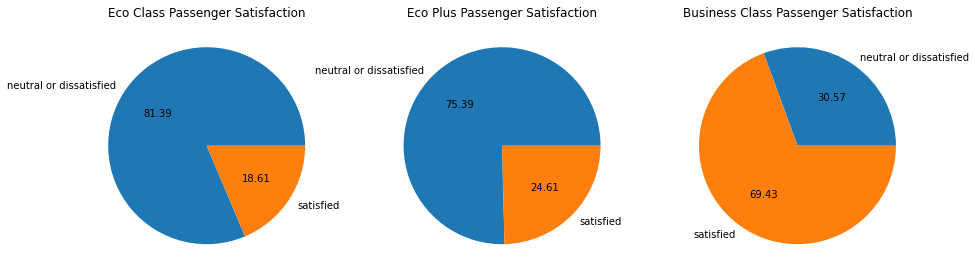

In [19]:
fig, ax = plt.subplots(1, 3, figsize = (15,5))

eco.groupby('satisfaction').size().plot(kind='pie', autopct='%.2f', ax = ax[0])
ax[0].set_title('Eco Class Passenger Satisfaction')
ax[0].set_ylabel('')

ecoplus.groupby('satisfaction').size().plot(kind='pie', autopct='%.2f', ax = ax[1])
ax[1].set_title('Eco Plus Passenger Satisfaction')
ax[1].set_ylabel('')

business.groupby('satisfaction').size().plot(kind='pie', autopct='%.2f', ax = ax[2])
ax[2].set_title('Business Class Passenger Satisfaction')
ax[2].set_ylabel('')

With each increase in class, customer satisfaction increases.

##### Inflight Wifi vs. Overall Satisfaction (deeper look)

<AxesSubplot:xlabel='Inflight wifi service', ylabel='count'>

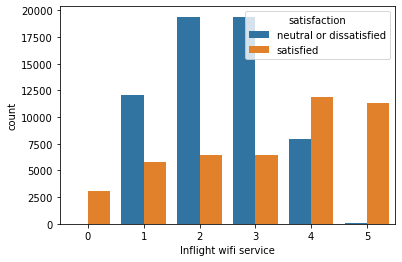

In [20]:
sns.countplot(x = 'Inflight wifi service', hue = 'satisfaction', data = df)

This is another telling figuring, passenger satisfaction increases when customers are satisifed with their inflight wifi.

##### Online Boarding vs. Overall Satisfaction (deeper look)

Let's first separate the data into bins: passengers who rated the online boarding process highly (4 or 5) vs. passengers who rated in poorly (3 or less).

In [21]:
#  process is a bit more tedious since we can't use comparison with categorical values

four = df.loc[(df['Online boarding'] == 4)]
five = df.loc[(df['Online boarding'] == 5)]
high =  pd.concat([four, five], ignore_index = True)

one = df.loc[(df['Online boarding'] == 1)]
two = df.loc[(df['Online boarding'] == 2)]
three = df.loc[(df['Online boarding'] == 3)]
low = pd.concat([one, two, three], ignore_index=True)


Text(0, 0.5, '')

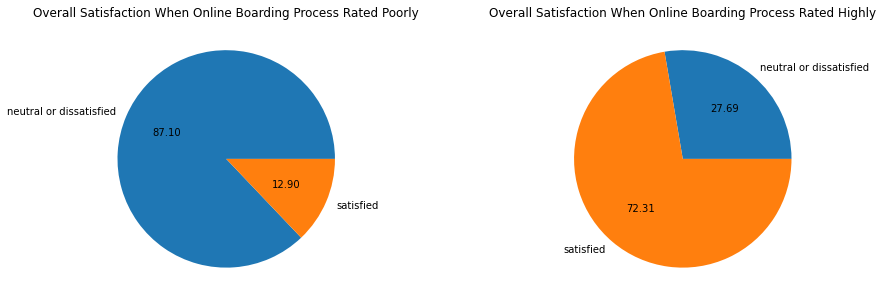

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

low.groupby('satisfaction').size().plot(kind='pie', autopct='%.2f', ax = ax[0])
ax[0].set_title('Overall Satisfaction When Online Boarding Process Rated Poorly')
ax[0].set_ylabel('')

high.groupby('satisfaction').size().plot(kind='pie', autopct='%.2f', ax = ax[1])
ax[1].set_title('Overall Satisfaction When Online Boarding Process Rated Highly')
ax[1].set_ylabel('')

These graphs are very telling -- online boarding is very important to passenger satisfaction

#### Secondary Feature Analysis

##### Flight Distance vs. Class of Travel

<AxesSubplot:xlabel='Flight Distance', ylabel='Count'>

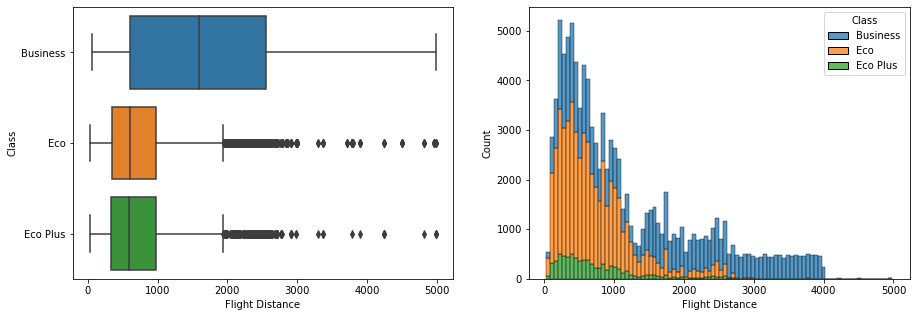

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Flight Distance", y = "Class", data = df, ax = ax[0])
sns.histplot(df, x = "Flight Distance", hue = "Class", multiple = "stack",  ax = ax[1])

From the graphs above, we can conclude that as flight distance increases, passengers are more likely to book business class for their flights.

##### Age vs. Customer Loyalty Status

Text(0.5, 1.0, 'Age vs. Loyalty Status')

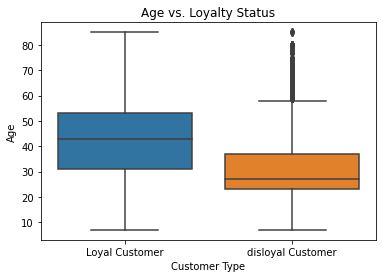

In [24]:
sns.boxplot(x = 'Customer Type', y = 'Age', data = df)
plt.title('Age vs. Loyalty Status')


It is evident that older passengers are more loyal than younger passengers generally. Let's investigate further, by first splitting the data between under 40 years old and over 40 years old.

In [25]:
under_40 = df.loc[df['Age'] <= 40]
over_40 = df.loc[df['Age'] > 40]

Text(0, 0.5, '')

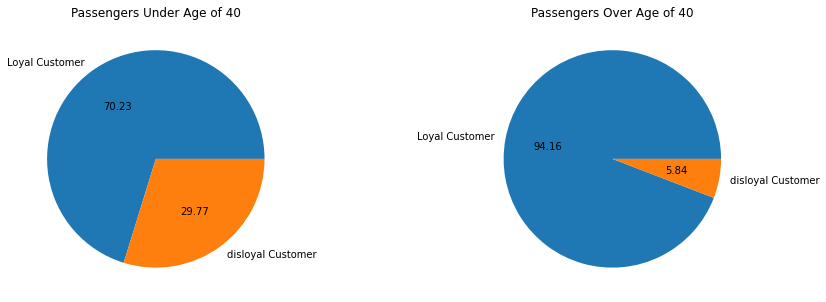

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))

under_40.groupby('Customer Type').size().plot(kind='pie', autopct='%.2f', ax = ax[0])
ax[0].set_title('Passengers Under Age of 40')
ax[0].set_ylabel('')

over_40.groupby('Customer Type').size().plot(kind='pie', autopct='%.2f', ax = ax[1])
ax[1].set_title('Passengers Over Age of 40')
ax[1].set_ylabel('')

##### Age vs. Type of Travel (business vs. personal)

<AxesSubplot:xlabel='Age', ylabel='Count'>

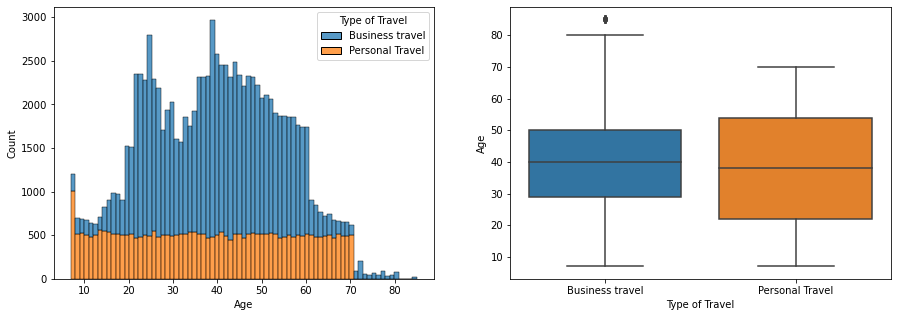

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Type of Travel", y = "Age", data = df, ax = ax[1])
sns.histplot(df, x = "Age", hue = "Type of Travel", multiple = "stack", ax = ax[0])

Age does not seem to have any effect on reasons for traveling. The only significant findings here is that those under the age of 20 and over the age of 70 are less likely to book for book for business (which is logical).

##### Age vs. Class of Travel

<AxesSubplot:xlabel='Age', ylabel='Count'>

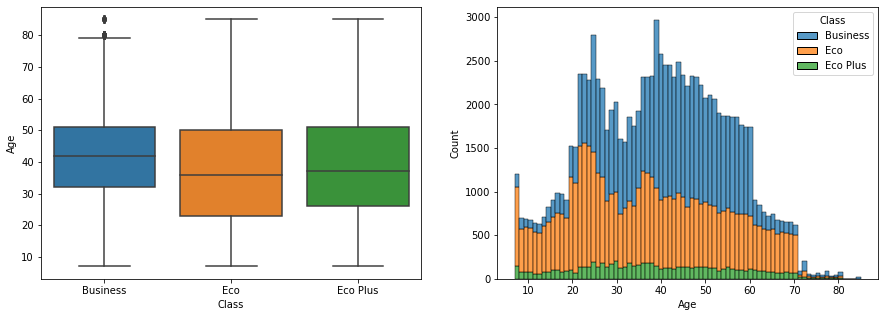

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Age", data = df, ax = ax[0])
sns.histplot(df, x = "Age", hue = "Class", multiple = "stack",  ax = ax[1])

Older customers are assumed to be slightly more likely to book business class on average.

##### Departure and Arrival Delays

The last feature I want to look it is the extent to which delays affect overall customer satisfaction. We all know from travel experiences that delays and cancellation (which is not provided in this dataset, unfortunately) can be incredibly frustrating. Let's investigate further.

Let's first do some exploring across the dataset.

In [29]:
max_departure_delay = df['Departure Delay in Minutes'].max()
max_arrival_delay = df['Arrival Delay in Minutes'].max()

print('Maximum arrival delay:', max_arrival_delay)
print('Maximum departure delay:', max_departure_delay)

Maximum arrival delay: 1584
Maximum departure delay: 1592


The average departure and arrival delays is around 15 minutes.

In [30]:
cols = ['Arrival Delay in Minutes', 'Departure Delay in Minutes']
df[cols].mean()

Arrival Delay in Minutes      15.133392
Departure Delay in Minutes    14.815618
dtype: float64

Since earlier in the notebook we assumed that departure delay and arrival delay are linearly related, let's prove it.

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

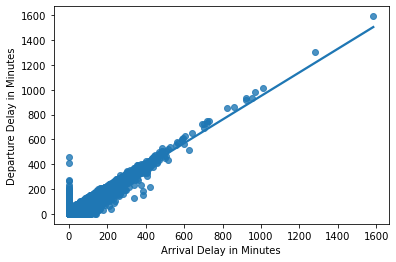

In [31]:
sns.regplot(x = 'Arrival Delay in Minutes', y = 'Departure Delay in Minutes', data = df)

The dependence between arrival delay and departure delay in linear, with a correlation of 0.96.

Let's group the data to see to what extent delays affect overall satisfaction. We will assume arrival and depature delay times are equal for the following.

In [32]:
zero_delay = df.loc[df['Arrival Delay in Minutes'] == 0]
fifteen_min = df.loc[(df['Arrival Delay in Minutes'] > 0) & (df['Arrival Delay in Minutes'] < 15)]
fifteen_to_sixty_min = df.loc[(df['Arrival Delay in Minutes'] >= 15) & (df['Arrival Delay in Minutes'] < 60)]
one_to_three_hrs = df.loc[(df['Arrival Delay in Minutes'] >= 60) & (df['Arrival Delay in Minutes'] < 180)]
three_hrs_plus = df.loc[df['Arrival Delay in Minutes'] > 180]

Text(0, 0.5, '')

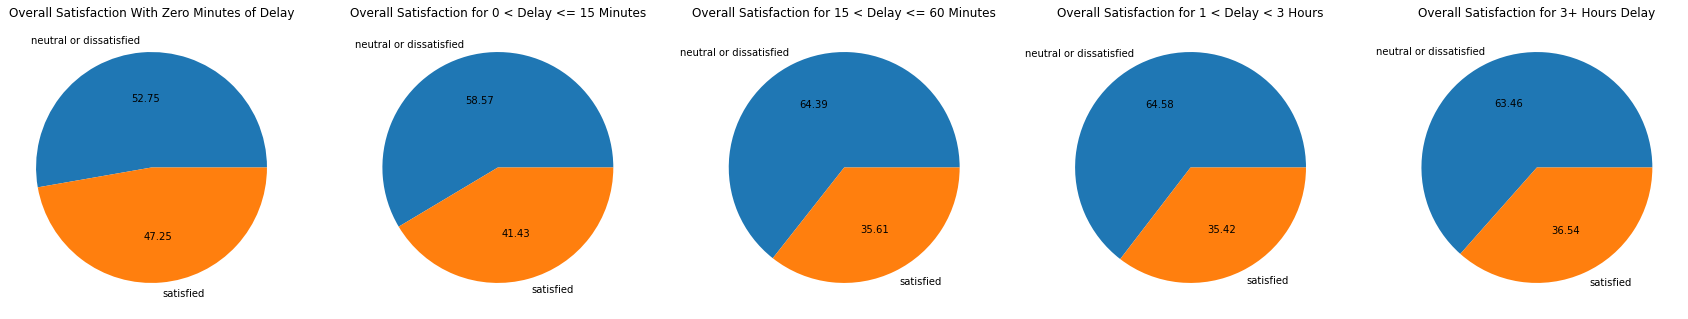

In [33]:
fig, ax = plt.subplots(1, 5, figsize = (30, 15))

zero_delay.groupby('satisfaction').size().plot(kind='pie', autopct='%.2f', ax = ax[0])
ax[0].set_title('Overall Satisfaction With Zero Minutes of Delay')
ax[0].set_ylabel('')

fifteen_min.groupby('satisfaction').size().plot(kind='pie', autopct='%.2f', ax = ax[1])
ax[1].set_title('Overall Satisfaction for 0 < Delay <= 15 Minutes')
ax[1].set_ylabel('')

fifteen_to_sixty_min.groupby('satisfaction').size().plot(kind='pie', autopct='%.2f', ax = ax[2])
ax[2].set_title('Overall Satisfaction for 15 < Delay <= 60 Minutes')
ax[2].set_ylabel('')

one_to_three_hrs.groupby('satisfaction').size().plot(kind='pie', autopct='%.2f', ax = ax[3])
ax[3].set_title('Overall Satisfaction for 1 < Delay < 3 Hours')
ax[3].set_ylabel('')

three_hrs_plus.groupby('satisfaction').size().plot(kind='pie', autopct='%.2f', ax = ax[4])
ax[4].set_title('Overall Satisfaction for 3+ Hours Delay')
ax[4].set_ylabel('')

Expectedly, customers are increasingly satisifed when there is no delay in their flights. Interesting to note that passengers on average are approximately equally dissatisfied when their flight is delayed 15 to 60 minutes and when their flight is delayed over 3 hours.

# Report

From the above analysis, the following suggestions are issues for the airline to potentially address:

1. **Loyalty Programs:** Emphasize increasing customer loyalty for younger passengers. 70% of passengers under the age of 40 are loyal customers while 94% of passengers over the age of 40 are loyal.
2. **Inflight Wifi Services:** Passengers particularly value good inflight wifi services, especially for longer plane travels. Improving this service will increase customer satisfaction.
3. **Business Class:** Passengers who fly on premium class (i.e. business and economy plus) are generally more satisfied with their service. Improving economy class to mimic the privileges of these more luxurious classes would improve economy satisfaction. It is to be noted that this is difficult to achieve without diminishing the value of business class for passengers who pay. Additionally, older passengers tend to be more likely to fly more luxurious classes, so making business class more accessible to younger passengers could improve satisfaction. Passengers flying longer flights are more likely to fly business class as well. Increasing business seating and accessibility on longer flights could improve passenger satisfaction.
4. **Online Boarding:** Passengers value online boarding immensely. Passengers who rated the online boarding process 3 or less (out of 5) were only 14% satisfied with the airline, while passengers who rate the process a 4 or 5 were over 72% satisfied. Improving online boarding 
5. **Delays:** While delays are never planned, passengers are more satisfied when they have lower delays. After a 15 minutes delay, passenger satisfaction begins noticeably decreasing.